## SpaceX Launch History API Rocket Reusability Analysis

## Research Question
Has reusability of rocket parts at SpaceX influenced them to launch a higher frequency of rockets? 
## Source
https://api.spacexdata.com/v5/launches

In [5]:

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
url = "https://api.spacexdata.com/v5/launches"
response = requests.get(url)
jsondata = response.json() 


In [11]:
TT, TF, FT, FF = [], [], [], [] #Establishes the four main conditions for the research question. When success and resusability are both true or false

for launch in jsondata:
    success = launch.get('success') #extract success and date
    date_utc = launch.get('date_utc')
    cores = launch.get('cores', []) #reused is stored inside cores
    reused = None
    if cores and isinstance(cores[0], dict): 
        reused = cores[0].get('reused')
    year_conv = {'year': str(pd.to_datetime(date_utc).year), 'success': success, 'reused': reused}
    if success is True and reused is True: #four conditions
        TT.append(year_conv) #appending dictionary
    elif success is True and reused is False:
        TF.append(year_conv)
    elif success is False and reused is True:
        FT.append(year_conv)
    elif success is False and reused is False:
        FF.append(year_conv)

dfTT = pd.DataFrame(TT).sort_values('year', ascending = False)
dfTF = pd.DataFrame(TF).sort_values('year', ascending = False)
dfFT = pd.DataFrame(FT) #empty data frame
dfFF = pd.DataFrame(FF).sort_values('year', ascending = False)

print(f" {dfTT} \n\n{dfTF} \n\n{dfFF}).")

      year  success  reused
113  2022     True    True
93   2022     True    True
91   2022     True    True
90   2022     True    True
89   2022     True    True
..    ...      ...     ...
3    2017     True    True
2    2017     True    True
1    2017     True    True
4    2017     True    True
0    2017     True    True

[114 rows x 3 columns] 

    year  success  reused
66  2022     True   False
65  2022     True   False
64  2022     True   False
63  2021     True   False
62  2021     True   False
..   ...      ...     ...
4   2012     True   False
2   2010     True   False
3   2010     True   False
1   2009     True   False
0   2008     True   False

[67 rows x 3 columns] 

   year  success  reused
4  2016    False   False
3  2015    False   False
2  2008    False   False
1  2007    False   False
0  2006    False   False).


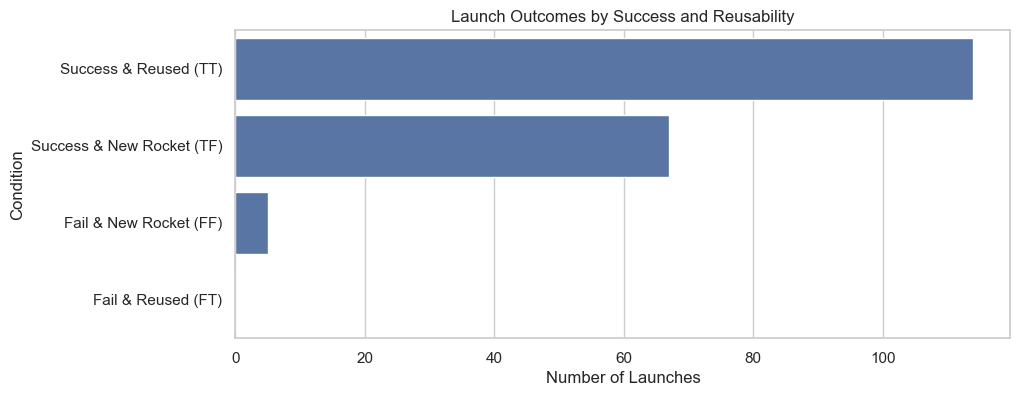

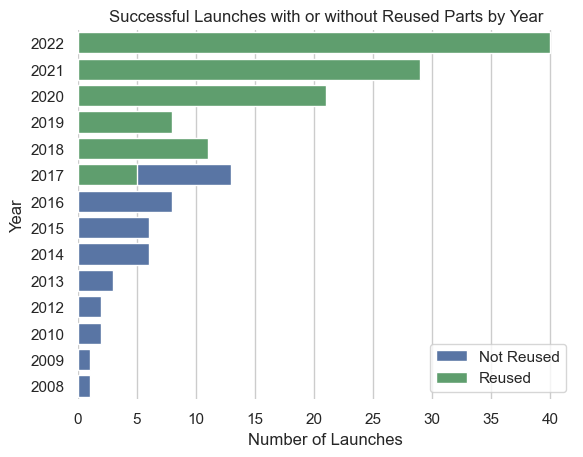

In [13]:
''' Visualizations'''

#Plots total launch outcomes
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 4))

plotting_df = pd.DataFrame({ #DataFrame for the horizontal bar plot, includes totals so we need the length of each separate DataFrame
    'Condition': ['Success & Reused (TT)', 'Success & New Rocket (TF)', 'Fail & New Rocket (FF)', 'Fail & Reused (FT)'],
    'Count': [len(dfTT), len(dfTF), len(dfFF), len(dfFT)]
})

sns.barplot(data=plotting_df, x='Count', y='Condition')
plt.title('Launch Outcomes by Success and Reusability')
plt.xlabel('Number of Launches')
plt.ylabel('Condition')
plt.show()

#Creates horizontal bar plot
dfTF_grouped = dfTF.groupby('year').size().reset_index(name='Count') #create grouped DataFrames for plotting
dfTF_grouped = dfTF_grouped.sort_values('year', ascending=False)

dfTT_grouped = dfTT.groupby('year').size().reset_index(name='Count')
dfTT_grouped = dfTT_grouped.sort_values('year', ascending=False)

sns.barplot(x="Count", y="year", data=dfTF_grouped, #bar plot of TF group
            label="Not Reused", color="b")

sns.barplot(x="Count", y="year", data=dfTT_grouped, #bar plot of TT group
            label="Reused", color="g")

ax.set(xlim=(0, 40), ylabel="", xlabel = "Successful Launches with or without Reused Parts by Year")
sns.despine(left=True, bottom=True)

plt.ylabel("Year")
plt.xlabel("Number of Launches")
plt.title('Successful Launches with or without Reused Parts by Year');

**Visual Descriptions**
We can see from the second graph that rocket launches increased significantly after SpaceX introduced reusability in 2017. We can also observe that the frequency of successful launches rose alongside this growth. The first graph shows a greater number of launches using reused rocket parts. Notably, there is no data indicating a failed launch where reused parts were involved.

**Visual Discussion:**
SpaceX has leveraged reusability to launch rockets more frequently and at a lower cost. This operational efficiency coupled with technological advancements has contributed to a steady increase in successful missions. In the early stages of the company, failed launches were more common and expensive. The absence of any failed launches involving reused parts suggests careful implementation and strong engineering practices. This trend illustrates how engineering reliability and cost efficiency through reusability has enabled SpaceX to scale operations safely.